# All 19 Sites!

In [54]:
df[df['date']=='24/01/2019']

,camera,date,lon,lat,pvpg,pv,pg,Eg,Ev,data_quantity,...,longitude,latitude,cloud_flag_atm,layer_flag,DW,FSC,TreeSnow,file_index,Eg_strong,Ev_strong
0,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.454545,0.727273,8,...,26.715727,67.389166,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
1,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.588235,0.647059,8,...,26.715660,67.389389,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
2,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.307692,0.923077,8,...,26.714904,67.391836,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
3,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.058824,1.000000,8,...,26.714836,67.392059,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
4,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.625000,0.500000,8,...,26.714659,67.392654,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
5,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.125000,0.875000,8,...,26.714306,67.393845,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
6,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.142857,1.142857,8,...,26.714238,67.394068,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN
7,sodankyla_full,24/01/2019,26.716073,67.393365,0.975556,1.13931,1.167857,0.375000,0.687500,8,...,26.714101,67.394514,1.0,0.0,1.0,1.0,1.0,1,NaN,NaN


1994


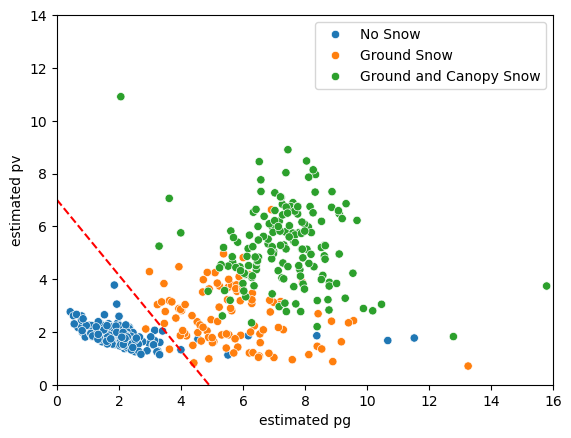

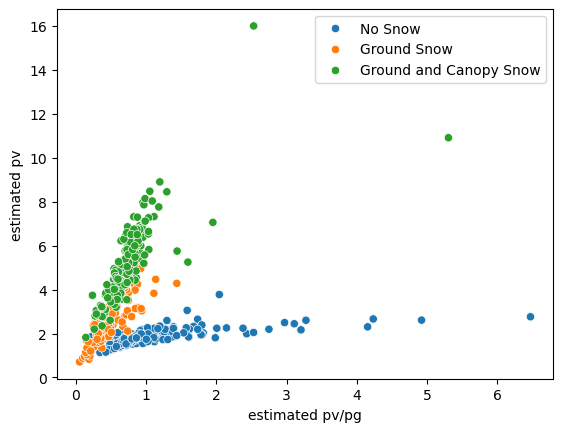

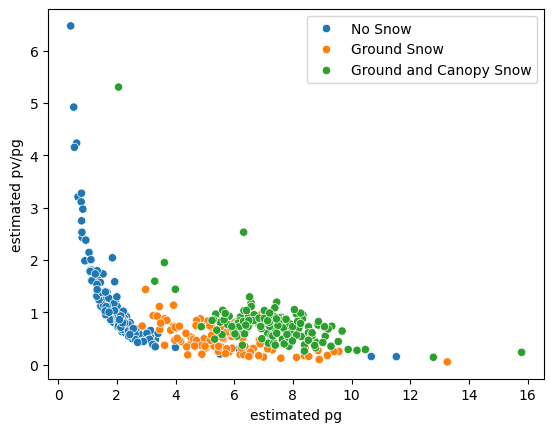

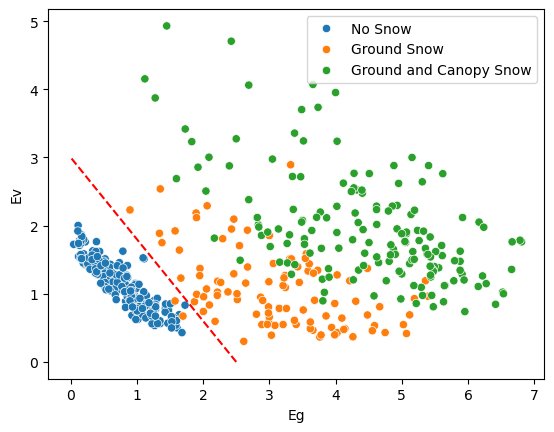

In [50]:
from scripts.imports import *

# df = pd.read_pickle('dataset_lcforest_outlier22_th3_1km_noprior_ta.pkl')
df = pd.read_pickle('dataset_lcforest_LOF10_th3_1km_noprior_ta_DW.pkl')

# print(df)
# mask = df['beam'] == 3
# df.loc[mask, ['pv','pg','Ev','Eg']] /= 0.85

# First create masked columns
df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
print(len(df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))]))
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    &(df_grouped['pv'] <= 16)&(df_grouped['pg'] <= 16)&(df_grouped['pvpg'] <= 7.5)
    &(df_grouped['pv_ratio_mean'] >= 1.3)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 15)]
data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.round(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv')
plt.xlim(0,16)
plt.ylim(0,14)
plt.plot([4.9,0],[0,7],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pv/pg')
plt.ylabel('estimated pv')
# plt.xlim(0,3)
# plt.ylim(0,12)
# plt.plot([0.29,0.29],[0,1.32],'r--')
# plt.plot([0.5,0.5],[1.53,7],'r--')
# plt.plot([0.3,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pg', y='pvpg', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv/pg')
# plt.xlim(0,20)
# plt.ylim(0,20)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='Eg_strong', y='Ev_strong', hue='Conditions')#, size='data_quantity')
plt.xlabel('Eg')
plt.ylabel('Ev')
# plt.xlim(0,20)
# plt.ylim(0,20)
plt.plot([2.5,0],[0,3],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

#### Logistic Regression

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your dataframe is called df
# features = ['pvpg', 'pv', 'pg', 'snr', 'pv_ratio_mean', 'pv_ratio_max']
features = ['pv', 'pg', 'pvpg','Ev_strong','Eg_strong']
target = 'JointSnowBinary'

data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)

X = data[features]
y = data[target]

# Optional: standardize the features (helps logistic regression perform better)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression on all data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_scaled, y)

# Predict on the same data (since you said to use all data)
y_pred = model.predict(X_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Get boolean mask of incorrect predictions
incorrect_mask = y != y_pred

# Optionally convert y to numpy array if needed
# y = y.to_numpy()

# Get the misclassified rows from the original dataframe
misclassified = data[incorrect_mask]

# Add true and predicted labels to the misclassified DataFrame for inspection
misclassified = misclassified.copy()
misclassified['TrueLabel'] = y[incorrect_mask]
misclassified['PredictedLabel'] = y_pred[incorrect_mask]

# Show the result
misclassified.sort_values(['JointSnow','camera','date'])

Confusion Matrix:
[[210   1]
 [  2 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       1.00      0.99      0.99       261

    accuracy                           0.99       472
   macro avg       0.99      0.99      0.99       472
weighted avg       0.99      0.99      0.99       472



/tmp/ipykernel_1278968/269097777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,data_quantity,...,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,JointSnowBinary,TrueLabel,PredictedLabel
2020,willowcreek,15/06/2019,45.837532,-90.098486,0.156911,1.674206,10.669778,1.093567,1.526913,29.862069,...,0.0,3.0,0.0,1.873222,1.873222,0.0,No Snow,0,0,1
826,marcell_MN,30/10/2020,47.491386,-93.474104,0.737414,2.111125,2.862877,1.576037,0.894664,17.242424,...,0.0,9.0,0.0,1.834949,1.834949,1.0,Ground Snow,1,1,0
2032,willowcreek,28/02/2024,45.801495,-90.033867,0.370851,1.344957,3.626674,1.695502,0.672269,23.400000,...,0.0,17.0,0.0,1.870726,1.870726,1.0,Ground Snow,1,1,0


#### Linear function of pv and pg

In [13]:
import pandas as pd

# # Define the features and target
# features = ['pv', 'pg', 'pvpg']
# target = 'JointSnowBinary'

# Ensure binary classification for the target
data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)

# Apply simple classification rule
data['PredictedLabel'] = (data['pv'] >= (-7 / 4.9) * data['pg'] + 7).astype(int)

# Evaluate predictions
y_true = data['JointSnowBinary']
y_pred = data['PredictedLabel']

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Get misclassified rows
incorrect_mask = y_true != y_pred
misclassified = data[incorrect_mask].copy()
misclassified['TrueLabel'] = y_true[incorrect_mask]
misclassified['PredictedLabel'] = y_pred[incorrect_mask]

# Show misclassified results
misclassified.sort_values(['JointSnow', 'camera', 'date'])


Confusion Matrix:
[[204   7]
 [  2 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       211
           1       0.97      0.99      0.98       261

    accuracy                           0.98       472
   macro avg       0.98      0.98      0.98       472
weighted avg       0.98      0.98      0.98       472



/tmp/ipykernel_1278968/146438530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)
/tmp/ipykernel_1278968/146438530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PredictedLabel'] = (data['pv'] >= (-7 / 4.9) * data['pg'] + 7).astype(int)


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,data_quantity,...,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,JointSnowBinary,PredictedLabel,TrueLabel
900,old_jack_pine,10/07/2023,53.920805,-104.714944,0.204382,1.126870,5.513549,1.505310,0.852644,24.361702,...,0.0,21.0,0.0,1.692889,1.692889,0.0,No Snow,0,1,0
1342,sodankyla_full,11/06/2020,67.330301,26.552235,0.331182,1.323706,3.996910,1.066667,0.866667,28.892857,...,0.0,12.0,0.0,1.477407,1.477407,0.0,No Snow,0,1,0
1925,willowcreek,04/06/2021,45.774468,-90.085562,0.380612,1.729934,4.545135,0.790625,1.378125,22.190476,...,0.0,8.0,0.0,1.875823,1.875823,0.0,No Snow,0,1,0
1939,willowcreek,05/09/2020,45.819514,-90.046791,0.153575,1.769743,11.523658,0.787879,1.625000,33.000000,...,0.0,7.0,0.0,1.947196,1.947196,0.0,No Snow,0,1,0
2013,willowcreek,15/06/2019,45.810505,-90.111409,0.300730,1.855212,6.169020,0.219549,1.761141,25.500000,...,0.0,3.0,0.0,1.590498,1.590498,0.0,No Snow,0,1,0
2018,willowcreek,15/06/2019,45.828523,-90.098486,0.221420,1.855591,8.380400,0.388889,1.764706,30.033333,...,0.0,3.0,0.0,1.620460,1.620460,0.0,No Snow,0,1,0
2020,willowcreek,15/06/2019,45.837532,-90.098486,0.156911,1.674206,10.669778,1.093567,1.526913,29.862069,...,0.0,3.0,0.0,1.873222,1.873222,0.0,No Snow,0,1,0
826,marcell_MN,30/10/2020,47.491386,-93.474104,0.737414,2.111125,2.862877,1.576037,0.894664,17.242424,...,0.0,9.0,0.0,1.834949,1.834949,1.0,Ground Snow,1,0,1
2032,willowcreek,28/02/2024,45.801495,-90.033867,0.370851,1.344957,3.626674,1.695502,0.672269,23.400000,...,0.0,17.0,0.0,1.870726,1.870726,1.0,Ground Snow,1,0,1


#### Linear function of Ev_strong and Eg_strong

In [14]:
import pandas as pd

# # Define the features and target
# features = ['pv', 'pg', 'pvpg']
# target = 'JointSnowBinary'

# Ensure binary classification for the target
data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)

# Apply simple classification rule
data['PredictedLabel'] = (data['Ev_strong'] >= (-3 / 2.5) * data['Eg_strong'] + 3).astype(int)

# Evaluate predictions
y_true = data['JointSnowBinary']
y_pred = data['PredictedLabel']

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Get misclassified rows
incorrect_mask = y_true != y_pred
misclassified = data[incorrect_mask].copy()
misclassified['TrueLabel'] = y_true[incorrect_mask]
misclassified['PredictedLabel'] = y_pred[incorrect_mask]

# Show misclassified results
misclassified.sort_values(['JointSnow', 'camera', 'date'])


Confusion Matrix:
[[211   0]
 [  2 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       211
           1       1.00      0.99      1.00       261

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472



/tmp/ipykernel_1278968/1944075549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JointSnowBinary'] = data['JointSnow'].apply(lambda x: 0 if x == 0 else 1)
/tmp/ipykernel_1278968/1944075549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PredictedLabel'] = (data['Ev_strong'] >= (-3 / 2.5) * data['Eg_strong'] + 3).astype(int)


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,data_quantity,...,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,JointSnowBinary,PredictedLabel,TrueLabel
826,marcell_MN,30/10/2020,47.491386,-93.474104,0.737414,2.111125,2.862877,1.576037,0.894664,17.242424,...,0.0,9.0,0.0,1.834949,1.834949,1.0,Ground Snow,1,0,1
2032,willowcreek,28/02/2024,45.801495,-90.033867,0.370851,1.344957,3.626674,1.695502,0.672269,23.400000,...,0.0,17.0,0.0,1.870726,1.870726,1.0,Ground Snow,1,0,1


# Plotting ATL08 from the Dataframe

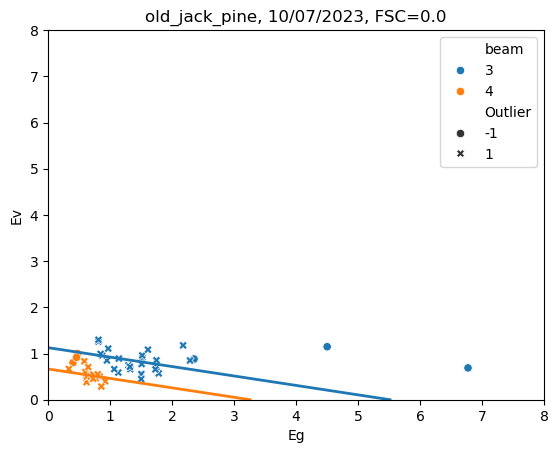

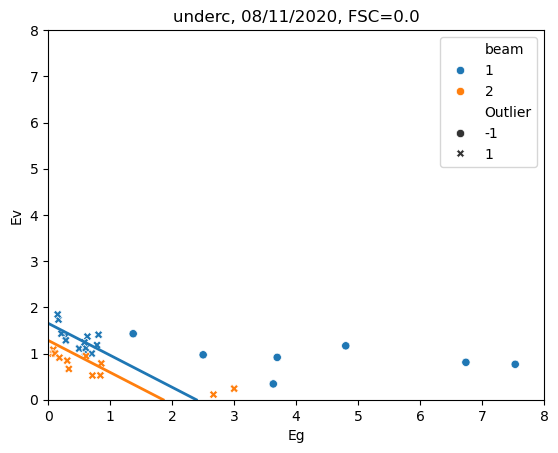

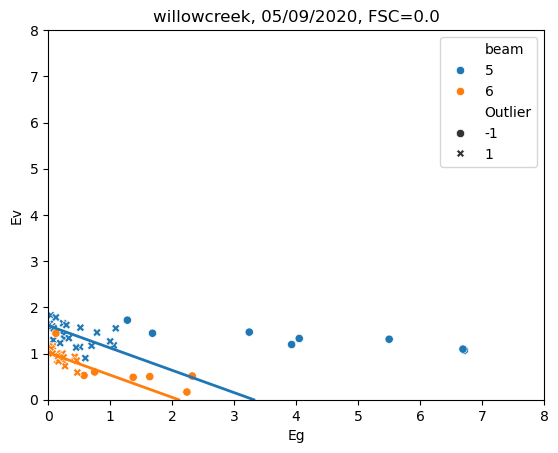

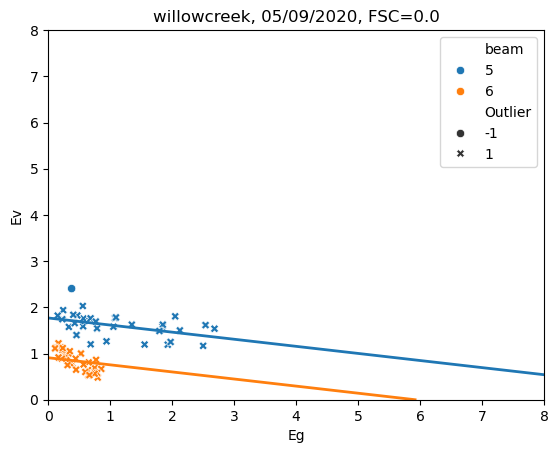

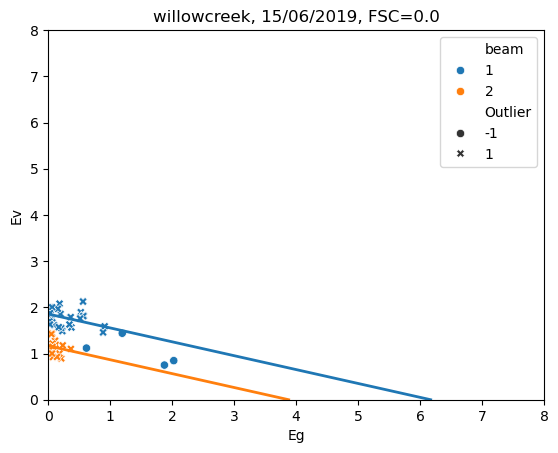

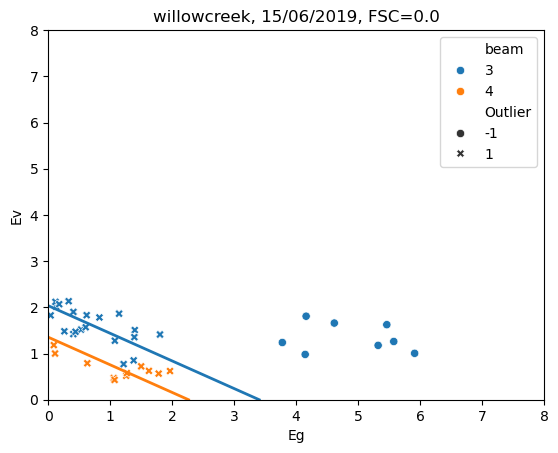

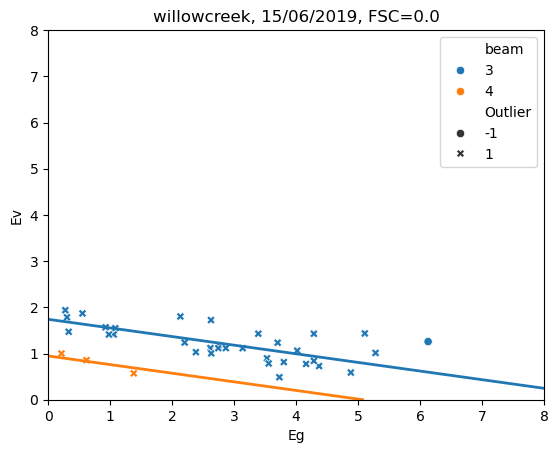

In [11]:
from scripts.parallel_blocks import *
    
# misclassified.columns
for idx, row in misclassified.iterrows():
    if row['FSC'] <= 0.05:
        plt.figure()
        plt.title(f"{row['camera']}, {row['date']}, FSC={row['FSC']}")
        
        test_plot = df[(df['camera'] == row['camera']) &
                       (df['date'] == row['date']) &
                       (df['lon'] == row['lon']) &
                       (df['lat'] == row['lat'])].copy()

        params, _, test = df_odr(test_plot, outlier_removal=10,w=[1, 0.25])

        # print(test)

        # Get sorted unique beams (hue order used by seaborn)
        beam_order = sorted(test['beam'].unique())

        # Create mapping from beam label to tab10 color
        tab10 = cm.get_cmap('tab10')
        color_map = {beam: tab10(i) for i, beam in enumerate(beam_order)}

        # Plot with fixed hue order and palette
        sns.scatterplot(data=test, x='Eg', y='Ev', hue='beam', style='Outlier',
                        hue_order=beam_order, palette=color_map)

        # Plot ODR lines in matching colors
        for b, beam in zip(params[1:], beam_order):
            plt.plot([0, -b / params[0]], [b, 0], color=color_map[beam], linewidth=2)

        plt.xlim(0, 8)
        plt.ylim(0, 8)
        plt.legend()
        plt.show()

        # break

# Fractional

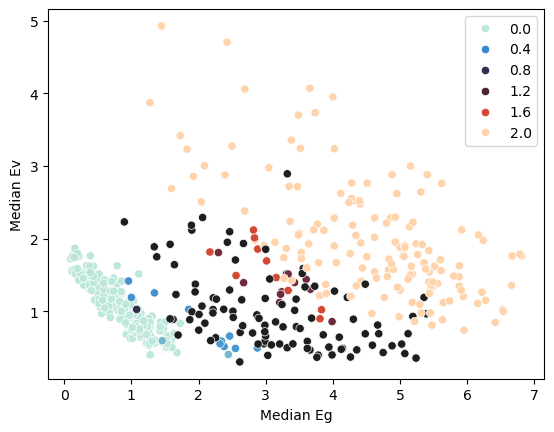

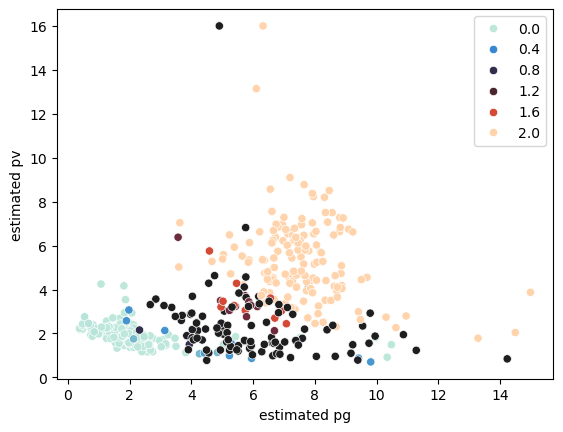

489


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow
1091,oregon_yp,21/04/2021,44.346323,-121.574518,0.579553,1.533815,2.646550,1.597953,0.606061,25.580645,0.789260,0.0,0.0,0.0,13.0,0.0,1.617017,1.617017,0.0
1237,queens,28/07/2020,44.560495,-76.342968,2.928315,2.390420,0.816312,0.168067,1.841432,17.400000,2.396981,0.0,0.0,0.0,4.0,0.0,1.672077,1.672077,0.0
724,marcell_MN,19/09/2021,47.473368,-93.434096,0.778307,1.487583,1.911307,0.672619,0.984848,22.612903,1.049484,0.0,0.0,0.0,14.0,0.0,1.454514,1.454514,0.0
725,marcell_MN,19/09/2021,47.482377,-93.434096,2.738636,2.139076,0.781073,0.250000,1.433333,25.711111,0.933714,0.0,0.0,0.0,14.0,0.0,1.526634,1.526634,0.0
726,marcell_MN,19/09/2021,47.491386,-93.434096,1.788691,2.010134,1.123802,0.351852,1.407670,27.512821,1.035423,0.0,0.0,0.0,14.0,0.0,1.487486,1.487486,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,wslcreek,31/10/2019,39.895905,-105.886046,1.041244,7.286172,6.997562,4.509804,2.763338,26.735849,0.608207,1.0,1.0,0.0,4.0,0.0,3.034835,3.034835,2.0
2152,wslcreek,31/10/2019,39.913923,-105.886046,0.954601,6.733692,7.053934,2.689076,4.061625,31.507937,0.515491,1.0,1.0,0.0,4.0,0.0,2.942568,2.942568,2.0
2153,wslcreek,31/10/2019,39.922932,-105.886046,1.143006,7.555892,6.610545,2.424677,4.705882,30.901639,0.342924,1.0,1.0,0.0,4.0,0.0,3.150994,3.150994,2.0
2041,willowcreek,28/02/2024,45.837532,-90.046791,0.277143,1.244520,4.490540,2.180565,0.595409,21.097561,20.105106,1.0,0.0,0.0,17.0,0.0,1.733405,1.733405,1.0


In [16]:
from scripts.imports import *

df = pd.read_pickle('dataset_lcforest_mahal22_th3_1km_noprior_ta_DW.pkl')
# print(df.columns)

df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
frac_data = df_grouped[((df_grouped['FSC'] >= 0.00)&(df_grouped['FSC'] <= 1.00))
    &(df_grouped['pv'] <= 16)&(df_grouped['pg'] <= 16)&(df_grouped['pvpg'] <= 7.5)
    &(df_grouped['pv_ratio_mean'] >= 1.3)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 15)]

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='Eg_strong', y='Ev_strong', hue='JointSnow', palette='icefire')#, size='data_quantity')
plt.xlabel('Median Eg')
plt.ylabel('Median Ev')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='pg', y='pv', hue='JointSnow', palette='icefire')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

print(len(frac_data))
frac_data.sort_values('FSC')

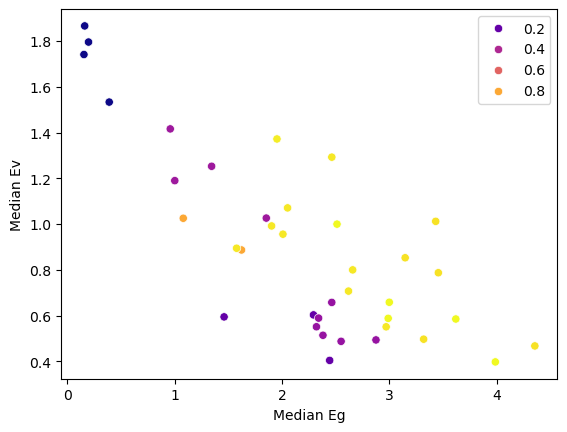

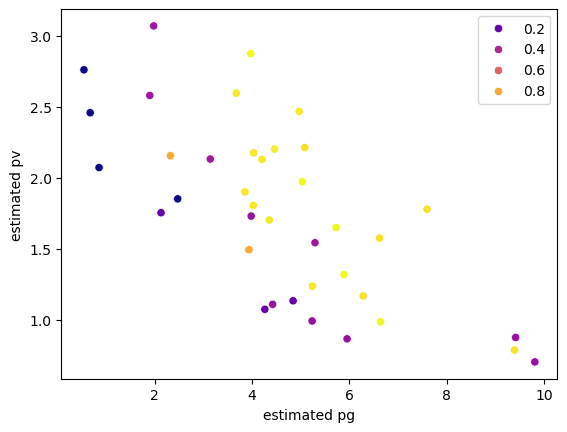

38


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow
2089,wslcreek,23/10/2023,39.895905,-105.909529,5.079523,2.759439,0.543248,0.160428,1.866126,21.250000,0.324033,0.02,0.0,0.000000,14.0,0.0,1.830331,1.830331,0.02
2090,wslcreek,23/10/2023,39.895905,-105.874304,0.749562,1.851493,2.470099,0.388889,1.533333,17.857143,0.260784,0.02,0.0,0.000000,14.0,0.0,1.515480,1.515480,0.02
2084,wslcreek,23/10/2023,39.859868,-105.909529,2.427570,2.071815,0.853452,0.153453,1.741176,27.651163,0.276500,0.02,0.0,0.000000,14.0,0.0,1.450372,1.450372,0.02
2087,wslcreek,23/10/2023,39.886895,-105.909529,3.661275,2.457539,0.671225,0.196078,1.795666,22.560976,0.335086,0.02,0.0,0.000000,14.0,0.0,1.663611,1.663611,0.02
93,delta_junction,02/05/2021,63.867586,-145.761632,0.234305,1.134344,4.841315,2.292609,0.603318,24.021277,0.731000,0.20,0.0,0.000000,16.0,0.0,1.993830,1.993830,0.20
99,delta_junction,02/05/2021,63.894614,-145.782096,0.252170,1.074267,4.260086,2.443439,0.404412,20.450000,0.593018,0.20,0.0,0.075000,16.0,0.0,1.802123,1.802123,0.20
186,delta_junction,26/04/2024,63.876595,-145.761632,0.824436,1.753913,2.127408,1.459459,0.594595,27.914286,0.299608,0.20,0.0,0.000000,32.0,0.0,1.414791,1.414791,0.20
955,old_jack_pine,18/04/2019,53.884768,-104.745537,0.071784,0.704139,9.809112,2.320261,0.551471,29.210526,2.938233,0.33,0.0,0.000000,3.0,0.0,1.742996,1.742996,0.33
959,old_jack_pine,18/04/2019,53.902786,-104.699648,0.093080,0.876297,9.414440,2.463102,0.657895,27.037037,3.258028,0.33,0.0,0.000000,3.0,0.0,2.073654,2.073654,0.33
968,old_jack_pine,18/04/2019,53.947832,-104.714944,0.434750,1.730316,3.980023,2.875000,0.493902,24.510204,3.850810,0.33,0.0,0.000000,3.0,0.0,2.331879,2.331879,0.33


In [17]:
from scripts.imports import *

df = pd.read_pickle('dataset_lcforest_mahal22_th3_1km_noprior_ta_DW.pkl')
# print(df.columns)

df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
frac_data = df_grouped[((df_grouped['FSC'] > 0.00)&(df_grouped['FSC'] < 1.00))
    &(df_grouped['pv'] <= 16)&(df_grouped['pg'] <= 16)&(df_grouped['pvpg'] <= 7.5)
    &(df_grouped['pv_ratio_mean'] >= 1.3)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 15)]

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='Eg_strong', y='Ev_strong', hue='JointSnow', palette='plasma')#, size='data_quantity')
plt.xlabel('Median Eg')
plt.ylabel('Median Ev')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='pg', y='pv', hue='JointSnow', palette='plasma')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

print(len(frac_data))
frac_data.sort_values('FSC')

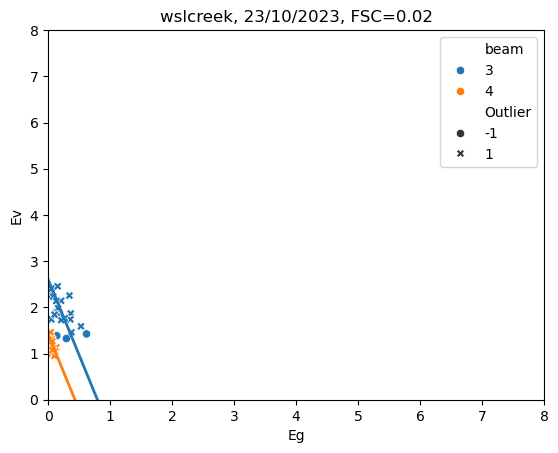

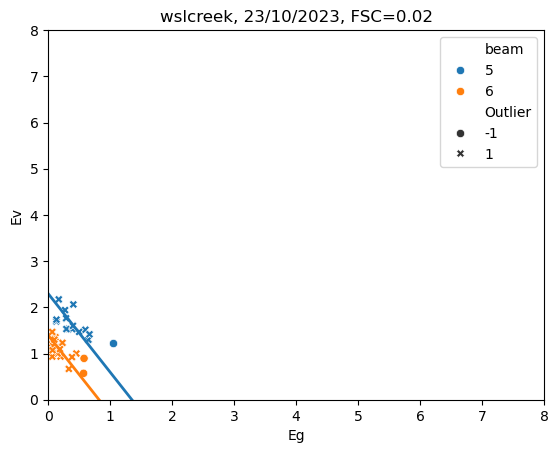

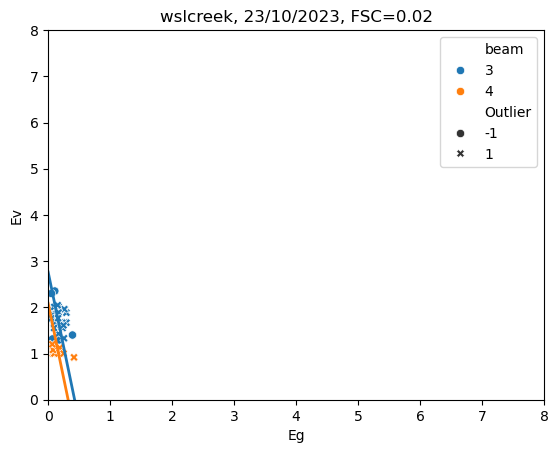

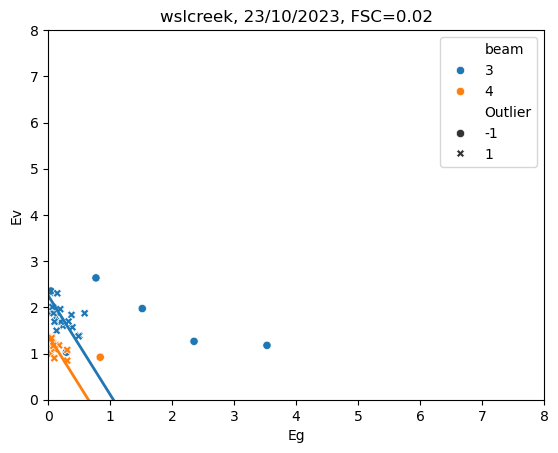

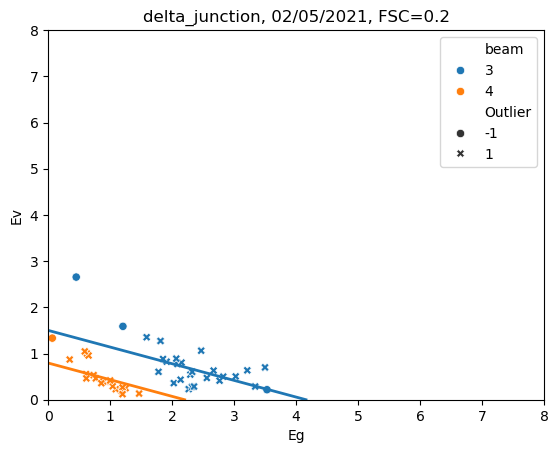

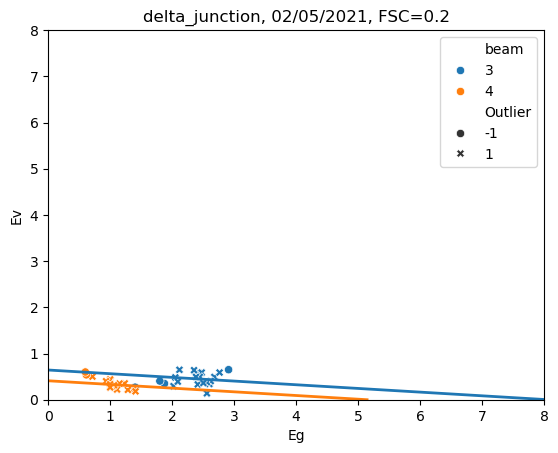

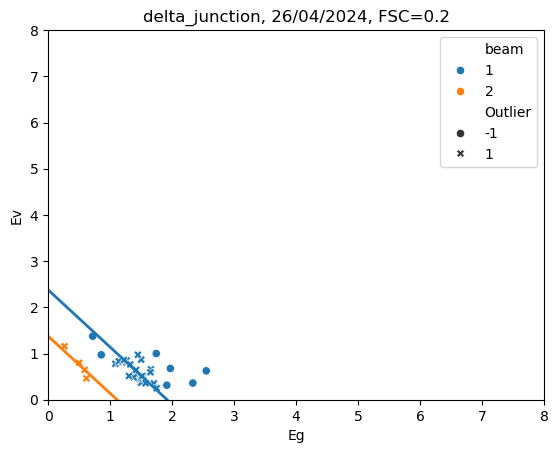

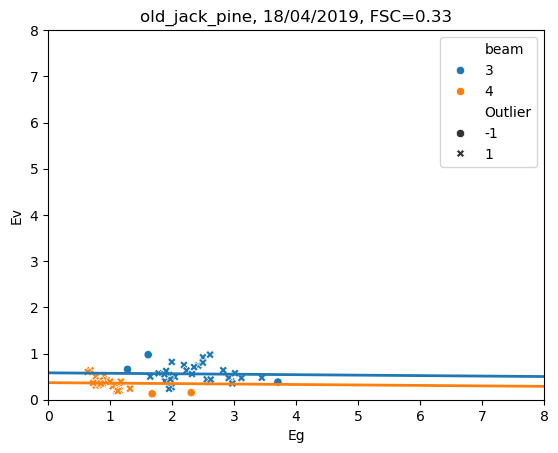

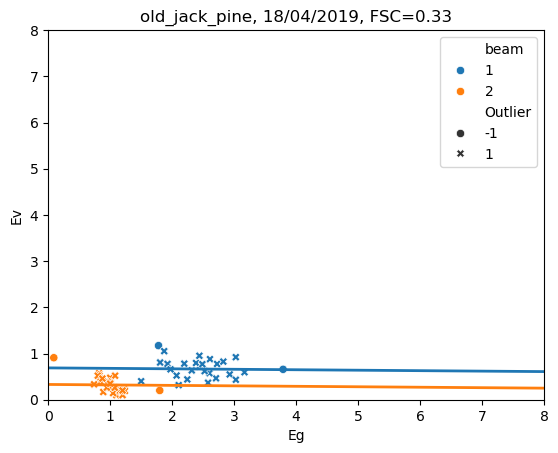

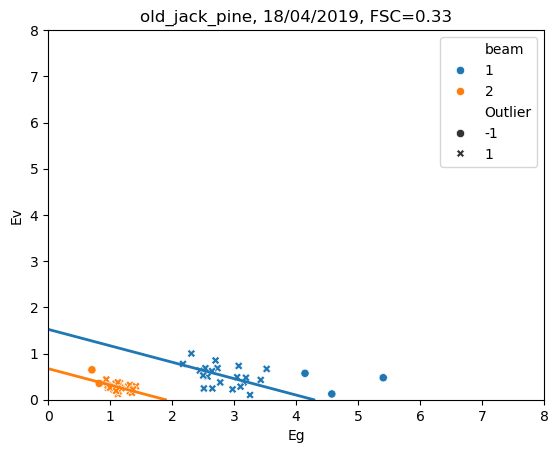

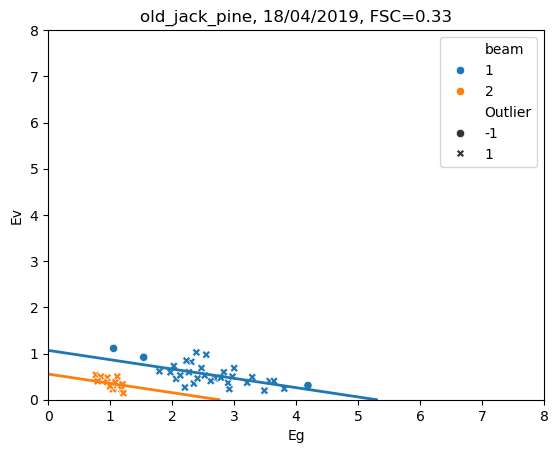

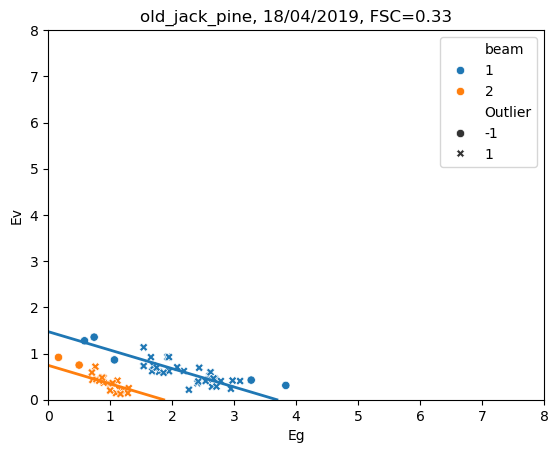

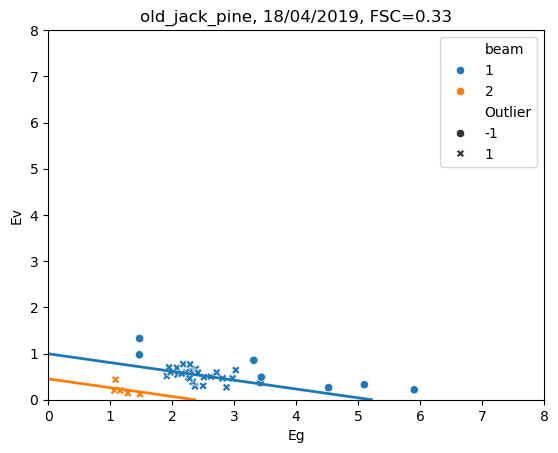

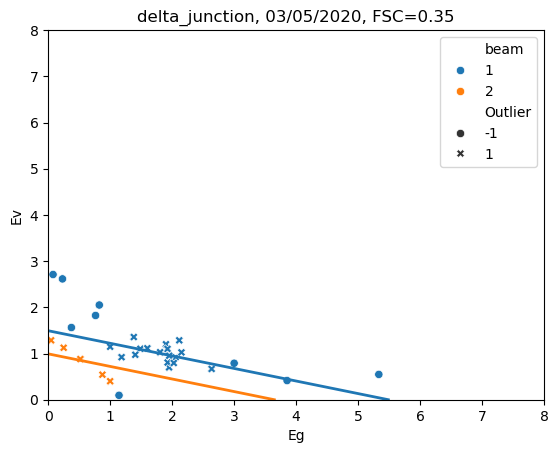

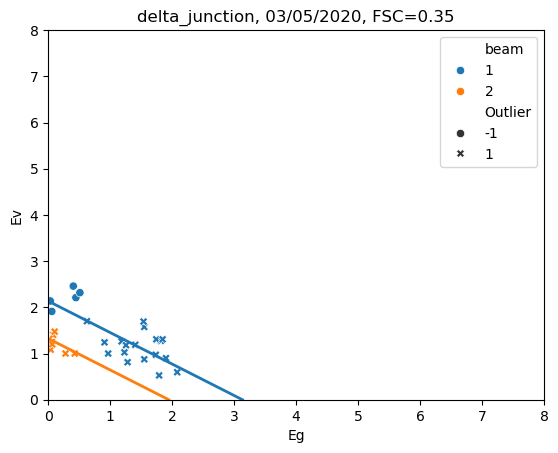

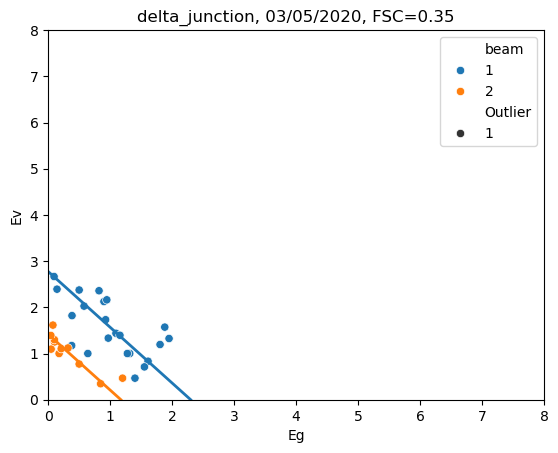

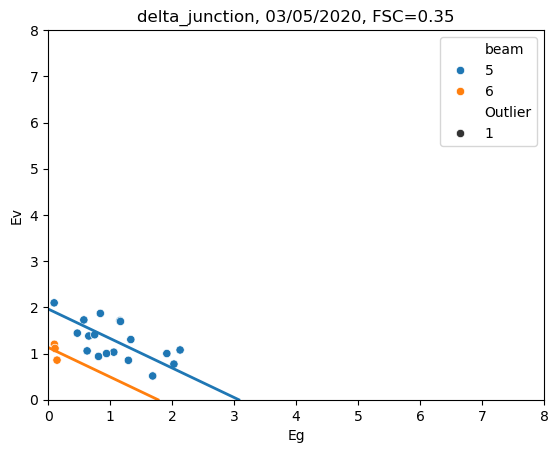

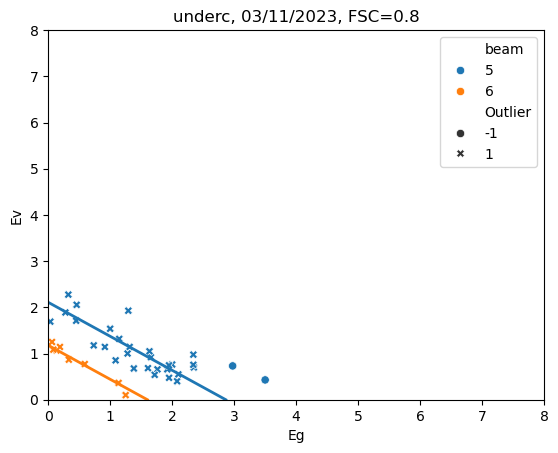

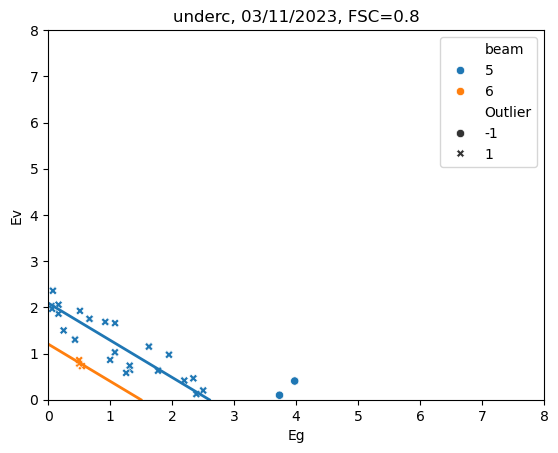

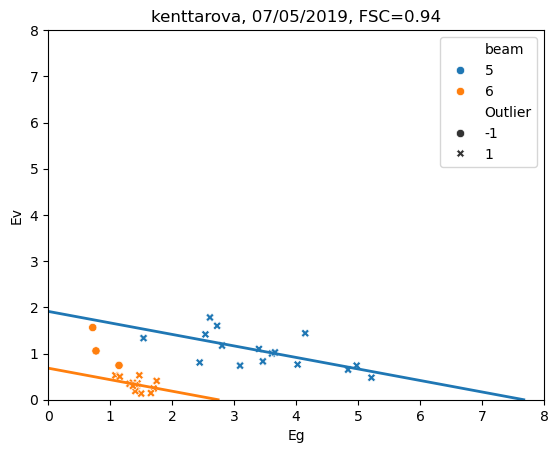

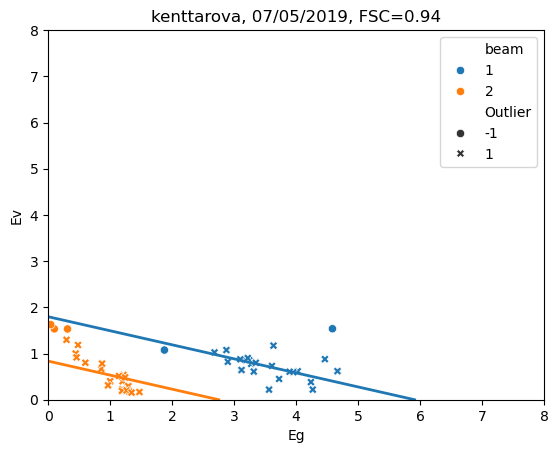

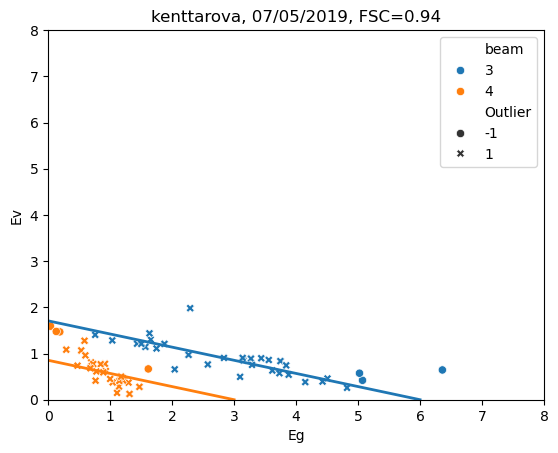

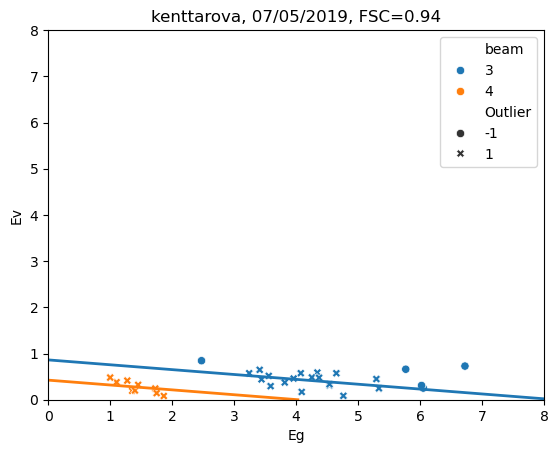

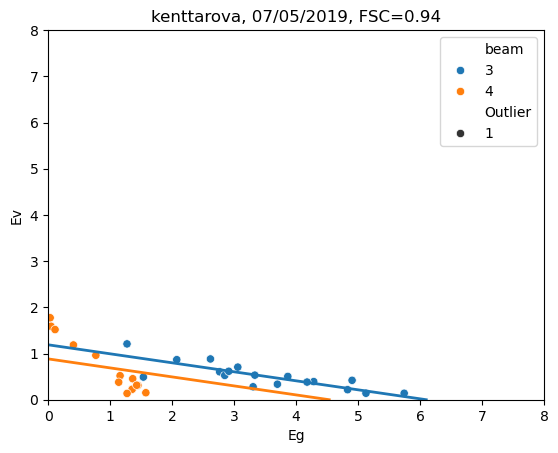

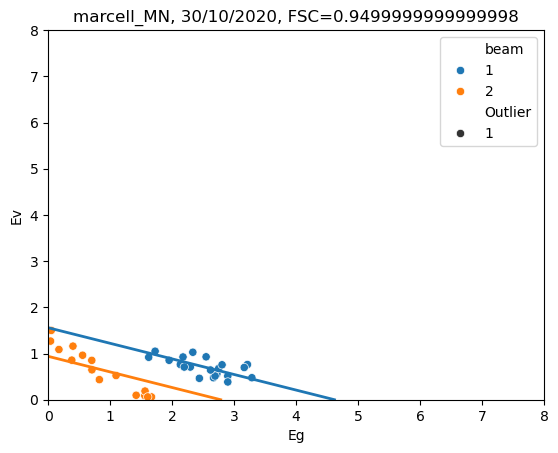

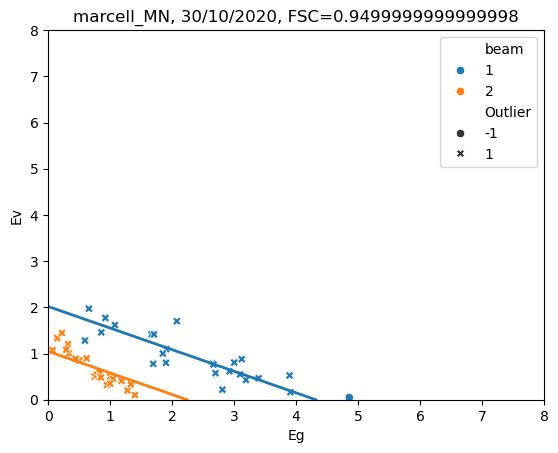

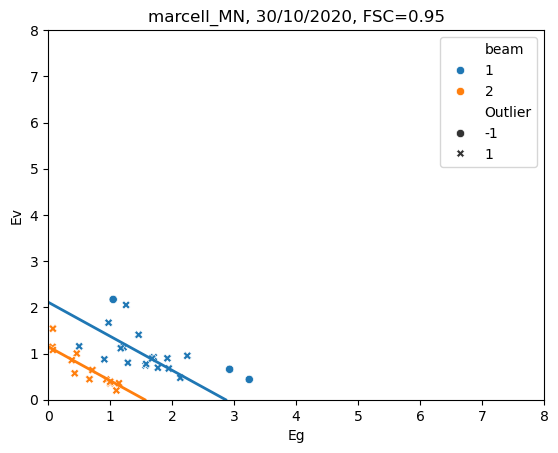

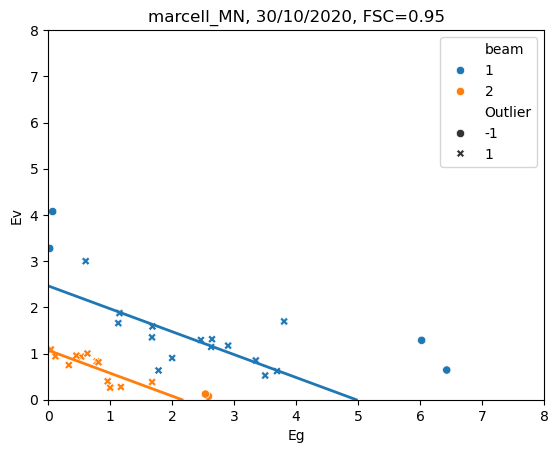

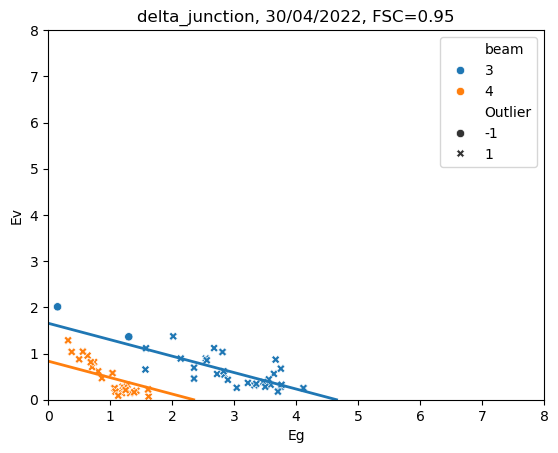

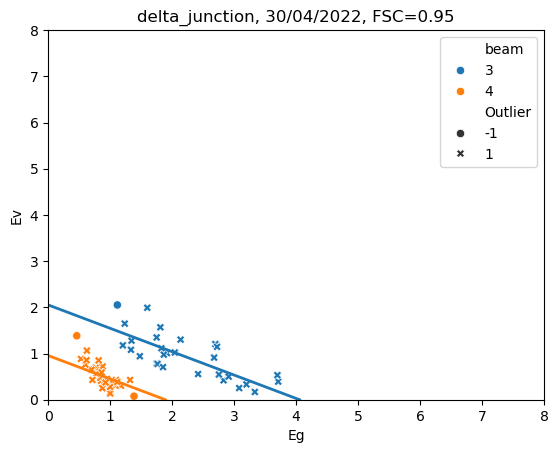

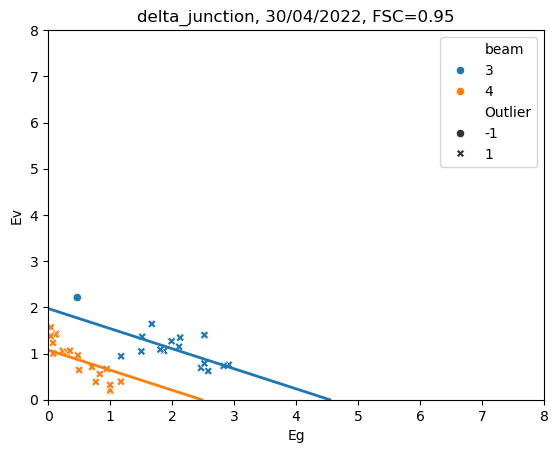

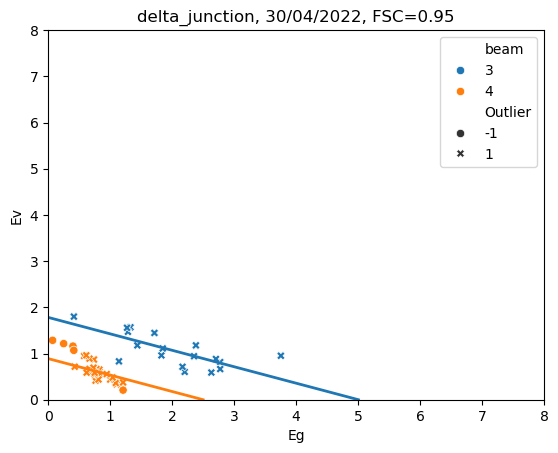

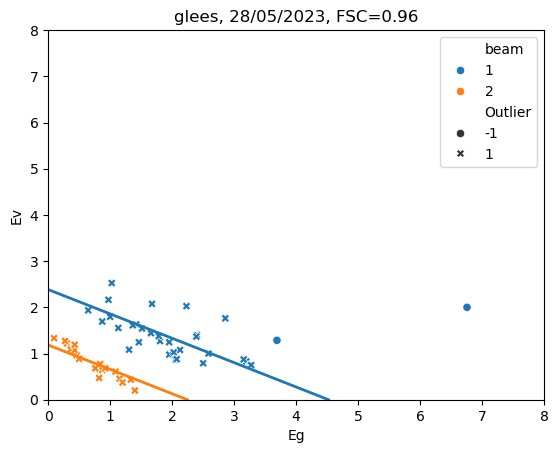

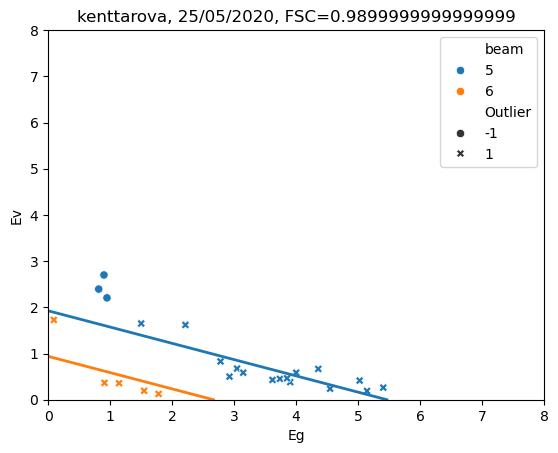

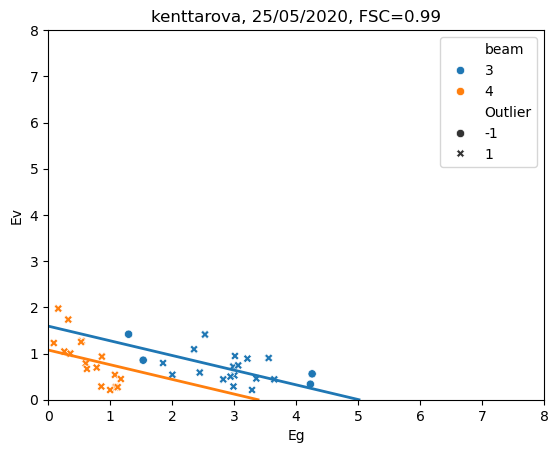

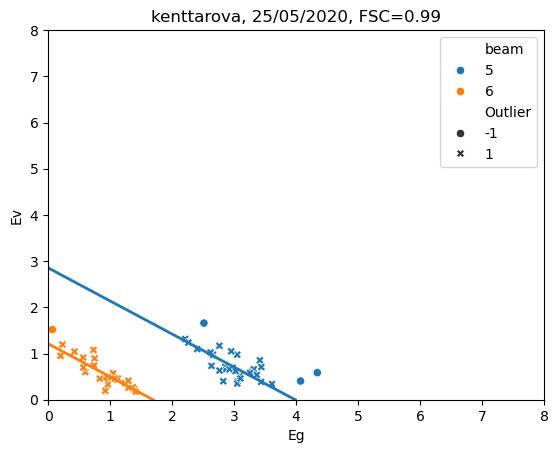

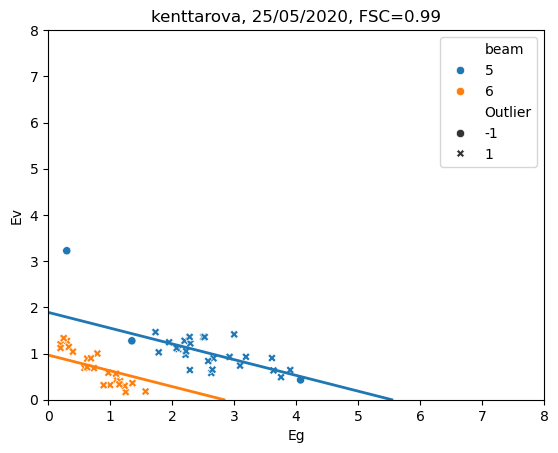

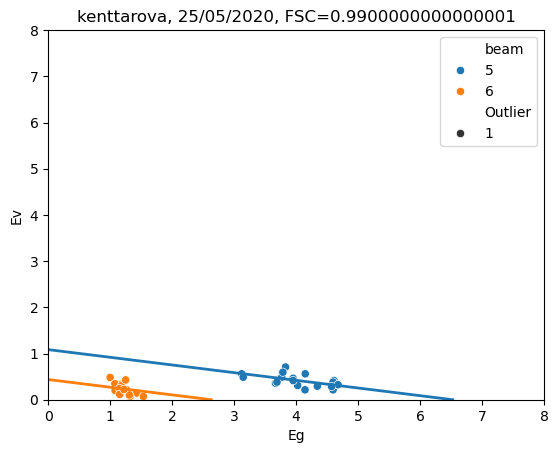

In [19]:
from scripts.parallel_blocks import *
    
# misclassified.columns
for idx, row in frac_data.sort_values('FSC').iterrows():
    plt.figure()
    plt.title(f"{row['camera']}, {row['date']}, FSC={row['FSC']}")
    
    test_plot = df[(df['camera'] == row['camera']) &
                   (df['date'] == row['date']) &
                   (df['lon'] == row['lon']) &
                   (df['lat'] == row['lat'])].copy()

    params, _, test = df_odr(test_plot, outlier_removal=10,w=[1, 0.25])

    # print(test)

    # Get sorted unique beams (hue order used by seaborn)
    beam_order = sorted(test['beam'].unique())

    # Create mapping from beam label to tab10 color
    tab10 = cm.get_cmap('tab10')
    color_map = {beam: tab10(i) for i, beam in enumerate(beam_order)}

    # Plot with fixed hue order and palette
    sns.scatterplot(data=test, x='Eg', y='Ev', hue='beam', style='Outlier',
                    hue_order=beam_order, palette=color_map)

    # Plot ODR lines in matching colors
    for b, beam in zip(params[1:], beam_order):
        plt.plot([0, -b / params[0]], [b, 0], color=color_map[beam], linewidth=2)

    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.legend()
    plt.show()

    # break